In [1]:
import pycirclize
from io import StringIO
from Bio import Phylo

Load phylo file from Type (Strain) Genome Server data. The resulting tree was made using genomic distance calculated from digital DNA:DNA hybridization

In [2]:
file = "../taxonomy/GBDP_genomes_trimming_D5.phy"
with open(file,"r") as file:
    content = file.readlines()[0]
    content = content.replace(" ","_").replace("scaffoldbra006a", "BRA006_Illumina").replace("bra006_minion","BRA006_minion")
tree = Phylo.read(StringIO(content),"newick")

In [3]:
content

'((((((((((BRA006_Illumina:0.001818,BRA006_minion:0.005788)75:0.02141795,Micromonospora_aurantiaca_ATCC_27029:0.0201742)80:0.00468867,Micromonospora_marina_DSM_45555:0.03205249)45:0.00051595,(Micromonospora_tulbaghiae_DSM_45142:0.02395509,Micromonospora_provocatoris_MT25:0.01805491)87:0.00312228)100:0.00748469,((Micromonospora_chalcea_DSM_43026:0.01825784,Micromonospora_fluminis_A38:0.01821416)100:0.00449008,Micromonospora_purpurea_DSM_43036:0.02516261)100:0.01242877)100:0.02480374,(Micromonospora_sediminicola_DSM_45794:0.04818797,(Micromonospora_humi_DSM_45647:0.03701372,Micromonospora_ferruginea_28ISP2-46:0.03644828)100:0.01701526)100:0.00507148)100:0.01325089,(Micromonospora_chaiyaphumensis_DSM_45246:0.05683861,Micromonospora_solifontis_PPF5-17:0.06305939)99:0.00623873)100:0.02035669,Micromonospora_globbae_WPS1-2:0.08760084)67:0.00078425,(Micromonospora_citrea_DSM_43903:0.07154232,Micromonospora_endolithica_JCM_12677:0.08123168)91:0.00367782):0.00292475,Salinispora_cortesiana_CNY202

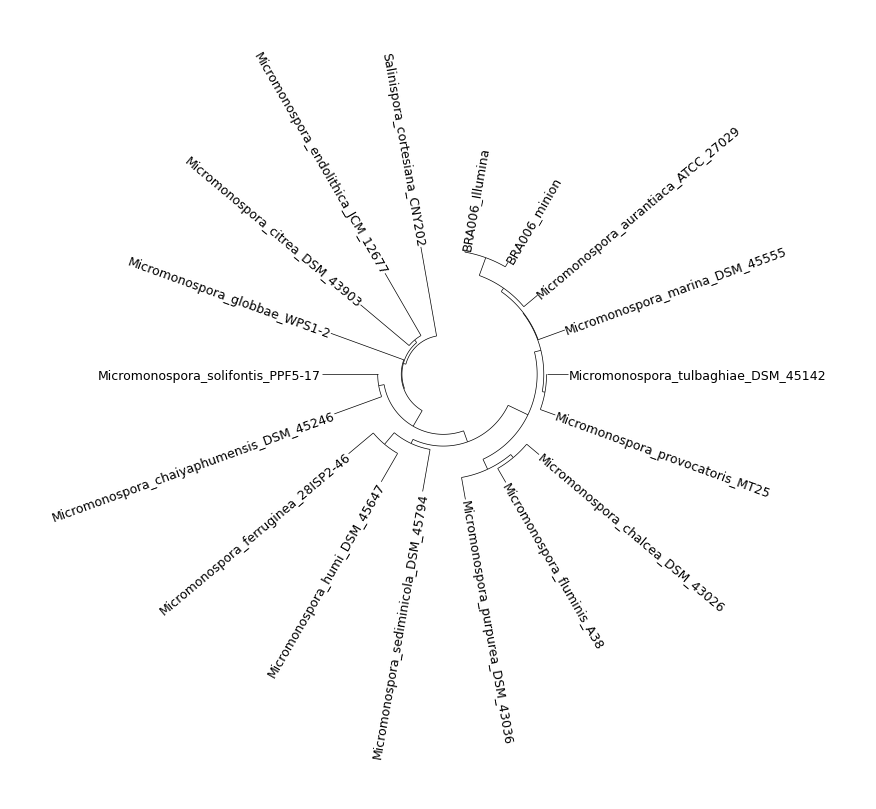

In [4]:
# Initialize circos sector with tree size
circos = pycirclize.Circos(sectors={"Tree": tree.count_terminals()})
sector = circos.sectors[0]

# Plot tree
track = sector.add_track((30, 100))
track.tree(
    tree, 
    use_branch_length=True, 
    leaf_label_size=9
    # node_color_list = [
    #     # (["Micromonospora_brasiliensis__BRA006"],(0.9882352941176471, 0.803921568627451, 0.8980392156862745, 1.0))
    #     # (["Micromonospora_aurantiaca_ATCC_27029__ATCC_27029"],(0.7019607843137254, 0.8705882352941177, 0.4117647058823529, 1.0)),
    #     # (["Micromonospora_aurantiaca__110B"],(0.5529411764705883, 0.8274509803921568, 0.7803921568627451, 1.0)),
    #     # (["Micromonospora_sp._L5__L5"],(0.5019607843137255, 0.6941176470588235, 0.8274509803921568, 1.0)),
    #     # (["Micromonospora_aurantiaca__G9"],(1.0, 1.0, 0.7019607843137254, 1.0))
    # ]
    )
fig = circos.plotfig().savefig("../figs/micromonospora.tree.svg", dpi = 1200, format = "svg")